### training cost calculations

In [ ]:
len(df.image_id.unique())/32

batches=200 # 6400 images w. batch size of 32
seconds_per_batch = 10

iterations = 5
parameters_space = 10

parameters_space*iterations*batches*seconds_per_batch/3600

---
# 

In [2]:
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from tqdm import tqdm

DATA_PATH = "../../data/private/"

# file received from Marjolijn on 12.11.2024 
f = DATA_PATH+"ExportJSON_Sceneherkenning1_20112024-_20241120084401(1).json"

with open(f) as handle:
    j = json.load(handle)

In [106]:
j.keys()

dict_keys(['info', 'licenses', 'object_labels', 'image_labels', 'images', 'image_annotations', 'object_annotations'])

In [122]:
j["image_annotations"]
# anns[~anns.valid]

j["images"]
j["image_labels"]

[{'id': 'fd6238ce-2203-4bca-8dd4-5286a5db5002',
  'source_id': 'https://www.wikidata.org/entity/Q112184776',
  'name': 'event',
  'parent_id': None},
 {'id': 'd0c80415-6282-4bdd-815f-0e02109a0d51',
  'source_id': 'https://www.wikidata.org/entity/Q112184776',
  'name': 'portrait',
  'parent_id': None},
 {'id': '94296429-ff6d-4698-9f31-c0357933342c',
  'source_id': 'https://www.wikidata.org/entity/Q112184776',
  'name': 'aerial photograph',
  'parent_id': None},
 {'id': '23bdcfda-c7f8-416f-9491-81e6521a9c81',
  'source_id': 'https://www.wikidata.org/entity/Q112184776',
  'name': 'interior view',
  'parent_id': None},
 {'id': 'f5b135da-0140-407b-b262-0eff3deef1b8',
  'source_id': 'https://www.wikidata.org/entity/Q112184776',
  'name': 'Built Environment',
  'parent_id': None},
 {'id': '12bae2dc-b10b-4324-b66f-b57d8361dd96',
  'source_id': 'https://www.wikidata.org/entity/Q112184776',
  'name': 'industrial structure',
  'parent_id': None},
 {'id': '411a0713-db2a-48bc-9f5c-99e82f8a521b',
  

## export contents

- info: basic info about export
- licenses: useless
- object_labels: empty
- image_labels: the "vocabulary"; each entry containing a label, an ID, a source (the NMVW thesaurus) and a parent ID 
- images: image record, incl handle URL  
- image_annotations: links between image_labels records and images records
- object_annotations: empty

In [4]:
voc = pd.DataFrame.from_records(j["image_labels"])#.set_index("id")

anns = pd.DataFrame.from_records(j["image_annotations"])


voc2 = pd.merge(voc, voc[["id", "name"]],
         left_on="parent_id",
         right_on="id",
        suffixes=("", "_parent")).set_index("id")

df = pd.merge(anns, voc2[["name", "parent_id", "name_parent"]],
         left_on="image_label_id",
         right_on="id")

# plt.plot(
#     list(df.name.
#      value_counts().
#      value_counts().
#      sort_index().values),
#     ".")

# plt.plot(
#     list(df.name.value_counts().sort_index().index),
#     list(df.name.value_counts().sort_index().values),
#     ".")


In [110]:
df

,id,image_id,image_label_id,valid,name,parent_id,name_parent
0,73370d54-420d-4a9c-95b7-1584670c4fb2,afe7fd79-59c3-449b-816a-88cde6a48406,ad590892-be5a-4eb0-82af-a5d352813496,True,group portrait,d0c80415-6282-4bdd-815f-0e02109a0d51,portrait
1,f6f37e71-7316-4ded-8cb2-c7295ba5e0fe,afe7fd79-59c3-449b-816a-88cde6a48406,ad590892-be5a-4eb0-82af-a5d352813496,True,group portrait,d0c80415-6282-4bdd-815f-0e02109a0d51,portrait
2,9bc69e44-e308-47d4-9366-3e4d3f703496,4482ccb8-406a-47c5-ba60-d028cf904b5f,ad590892-be5a-4eb0-82af-a5d352813496,True,group portrait,d0c80415-6282-4bdd-815f-0e02109a0d51,portrait
3,3e683032-9888-4209-9f95-faf507becdfc,4482ccb8-406a-47c5-ba60-d028cf904b5f,ad590892-be5a-4eb0-82af-a5d352813496,True,group portrait,d0c80415-6282-4bdd-815f-0e02109a0d51,portrait
4,2d0b4cfc-a4df-4488-b1ac-3844ea9aa56f,764d53a3-1467-4fe7-9308-779e172a0f6e,ad590892-be5a-4eb0-82af-a5d352813496,True,group portrait,d0c80415-6282-4bdd-815f-0e02109a0d51,portrait
...,...,...,...,...,...,...,...
9699,840da9f2-de50-463c-9c0c-7321b3199dc6,f8e96ee0-3c46-48d3-9b53-40f158b9c893,3dba09d9-fc0e-4f0f-99fa-9dec8a2ee558,True,studio portrait,d0c80415-6282-4bdd-815f-0e02109a0d51,portrait
9700,1f2cd922-6c17-4d80-a8d7-587299641f04,f8e96ee0-3c46-48d3-9b53-40f158b9c893,3dba09d9-fc0e-4f0f-99fa-9dec8a2ee558,True,studio portrait,d0c80415-6282-4bdd-815f-0e02109a0d51,portrait
9701,b43132db-65d0-42c0-a6c1-c5b56710d691,6d0c8e7d-5330-42cf-be53-bba0331d6899,a133f85c-1fb3-4dc6-a2da-7e7e8c64d69a,True,armed forces or police,fd6238ce-2203-4bca-8dd4-5286a5db5002,event
9702,84efb452-41c3-4a43-bd44-6a0104af3b93,6d0c8e7d-5330-42cf-be53-bba0331d6899,ad590892-be5a-4eb0-82af-a5d352813496,True,group portrait,d0c80415-6282-4bdd-815f-0e02109a0d51,portrait


In [5]:
# basic stats

print(f"number of images:\t {len(df.image_id.unique())}")
print(f"number of annotations:\t {len(df)}")

number of images:	 3799
number of annotations:	 9704


---
# pure label distributions

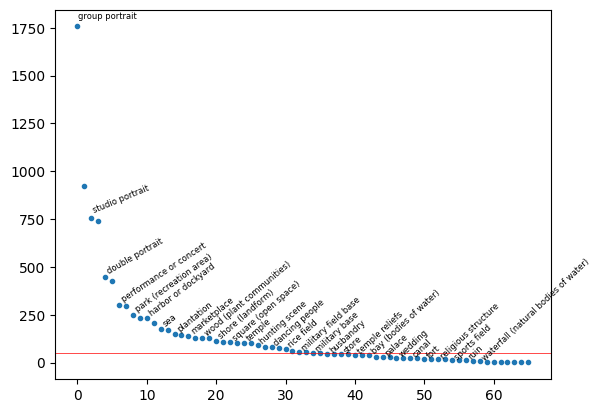

In [28]:
label_counts = df.name.value_counts()
plt.plot(
    list(label_counts.values),
    ".")
plt.axhline(50, c="red", lw=0.5)
# plt.annotate("frequency of 50", xytext=(0, 50), xy=(0, 0), arrowprops=dict(facecolor="black"))
# plt.yticks([50], ["50"])

for i in range(30):
    cur = label_counts.index[i*2]
    cur_y = label_counts.values[i*2]
    plt.annotate(cur, xy=(i*2+0.1, cur_y+cur_y**0.5), rotation=45*(1-1/(i+1)), fontsize=6)#, xy=(i*2, cur_y), arrowprops=dict(facecolor='black', shrink=0.05, width=0.001, headwidth=0.1))

In [105]:
# len()/len(label_counts)

label_counts[label_counts < 147].sum()

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

---
# labels per image

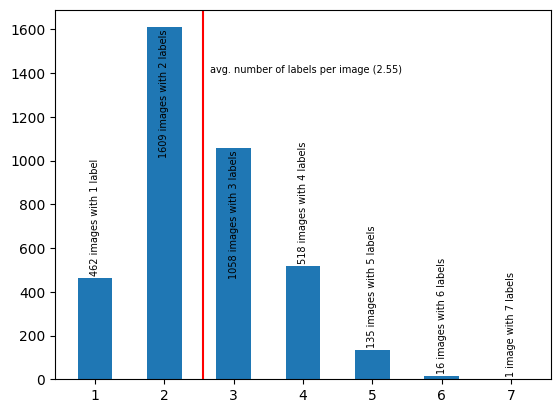

In [7]:
image_label_nums = df.image_id.value_counts().value_counts().sort_index()

# 1609 images have 2 labels
# 1058 images have 3 labels
# etc

plt.bar(list(image_label_nums.index),
    list(image_label_nums.values),
    0.5)

avg = sum(i*v for i, v in enumerate(image_label_nums, 1))/image_label_nums.sum()
plt.axvline(avg, c="r")
plt.annotate(f"avg. number of labels per image ({avg:.2f})", xy=(avg+0.1, 1400), fontsize=7)

for i, v in enumerate(image_label_nums):
    plt.annotate(f"{v} image{'s' if v > 1 else ''} with {i+1} label{'s' if i > 0 else ''}", 
                 xy=(i+1, v+(-10 if v > 1000 else 10)), 
                 rotation=90, fontsize=7, horizontalalignment="center", 
                 verticalalignment=("top" if v > 1000 else "bottom"))

In [71]:
image_label_nums[::-1].cumsum()/3799

image_label_nums[image_label_nums.index > 5].sum()/3799

image_label_nums

count
1     462
2    1609
3    1058
4     518
5     135
6      16
7       1
Name: count, dtype: int64

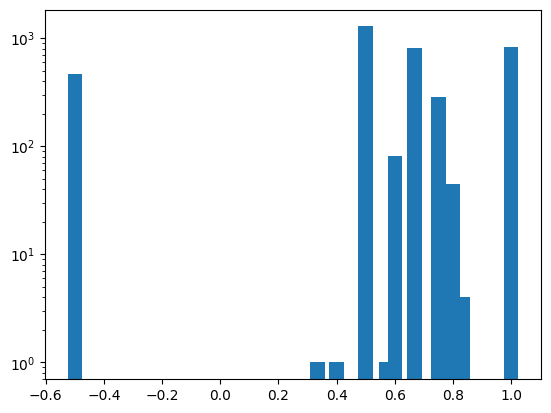

In [87]:
label_variances = df.groupby("image_id").name.apply(
    lambda sub: len(sub.unique())/len(sub) if len(sub) > 1 else -0.5
).value_counts().sort_index()

# 1.0 => all assigned labels for an image is different
# 0.5 => the number of total labels is 2 times the number of unique labels
# x -> 0. => there are many labels but all of them are the same (practically only possible if len(sub) <= 1)

plt.bar(list(label_variances.index), (list(label_variances.values)), width=0.05)

# plt.hist(list(label_variances))

plt.yscale("log")

100%|████████| 100000/100000 [00:02<00:00, 37895.44it/s]


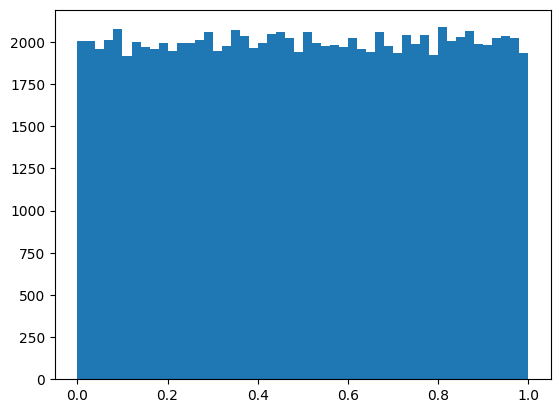

In [97]:
def sample_frac():
    n = np.random.randint(1, 7000)
    return np.random.randint(1, n)/n if n > 1 else sample_frac()

X = np.asarray([sample_frac() for i in tqdm(range(100000))])
_=plt.hist(X, bins=50)

<Axes: >

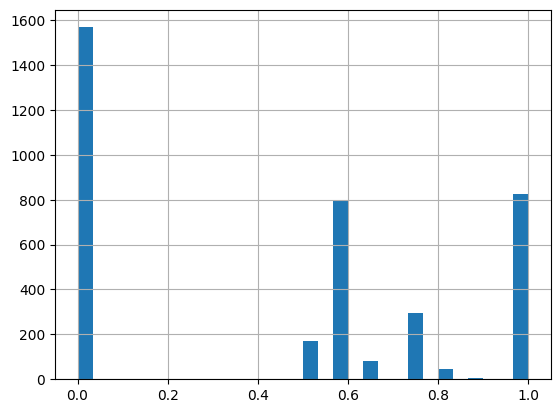

In [18]:
from collections import Counter
def entropy(ls):
    ps = np.asarray(list(Counter(ls).values()))/len(ls)
    if len(ps) <= 1:
        return 0.0
    return - (ps*np.log2(ps)).sum()/np.log2(len(ls))

ents = df.groupby("image_id").name.apply(entropy)

ents.hist(bins=30)#histtype="step")
# label_variances.hist(histtype="step")

In [57]:
print(
    df.groupby("image_id").name.apply(lambda sub: len(sub.unique())/len(sub)).mean()*100,
    " % of labels are different (percent of the total possible number)"
)

73.00793441883202  % of labels are different (percent of the total possible number


In [86]:
df.groupby("image_id").name.apply(lambda sub: (len(sub.unique()) == len(sub))
                                             and (len(sub) > 1)
                                             ).sum()/3799

df.groupby("image_id").name.apply(lambda sub: (len(sub) > 3) and (len(sub.unique()) == 3)).sum()

# for i in image_label_nums.index:



diff_nums = df.groupby("image_id").name.apply(lambda sub: len(sub.unique()))

IndentationError: expected an indented block after 'for' statement on line 7 (1764354453.py, line 11)

---

In [ ]:
df.groupby("image_id").name.apply(len).sort_values()

In [ ]:
lists = df.groupby("image_id").name

cooc = [[lists.apply(lambda ls: int(a in ls and b in ls)).sum() 
         for b in sorted(df.name.unique())] for a in tqdm(sorted(df.name.unique()))]

In [ ]:
names = sorted(df.name.unique())
cooc = pd.DataFrame(np.zeros((len(names), len(names))), columns=names, index=names, dtype=int)


for iid, ls in tqdm(df.groupby("image_id").name):
    for a in ls:
        for b in ls:
            # print(a, b)
            if not a == b:
                cooc.loc[a, b] += 1

In [ ]:
cooc.sum(0).sort_values()

In [ ]:
cooc.loc["group portrait"].sort_values()

# df.name.apply(lambda x: x == "group portrait").sum()